In [19]:
import matplotlib.pyplot as plt
from pathlib import Path
import json

def sort_by_time(path):
    return path.stem.split('_')[-1]

one_gpu_result_paths = sorted(list(Path("../data/benchmarking-batch/one_gpu").glob("*.json")), key=sort_by_time)
two_gpu_result_paths = sorted(list(Path("../data/benchmarking-batch/two_gpu").glob("*.json")), key=sort_by_time)

one_gpu_results = []
two_gpu_results = []

for path in one_gpu_result_paths:
    with open(path, "r") as f:
        one_gpu_results.append(json.load(f))

for path in two_gpu_result_paths:
    with open(path, "r") as f:
        two_gpu_results.append(json.load(f))

print(one_gpu_results[0])
print(two_gpu_results[0])

{'total_time': 63.380805015563965, 'throughput': 15.777647503127126, 'num_examples': 1000}
{'total_time': 74.45993137359619, 'throughput': 13.430041923925332, 'num_examples': 1000}


/tmp/ipykernel_11293/278104601.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gpu_config', y='throughput', data=combined_df, ax=ax1, palette=colors)
/tmp/ipykernel_11293/278104601.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gpu_config', y='total_time', data=combined_df, ax=ax2, palette=colors)


Summary Statistics:
           throughput                                 total_time            \
                 mean       std        min        max       mean       std   
gpu_config                                                                   
1 GPU       15.781750  0.016653  15.739252  15.797832  63.364393  0.066983   
2 GPUs      13.445818  0.021806  13.423471  13.501357  74.372744  0.120303   

                                  
                  min        max  
gpu_config                        
1 GPU       63.299827  63.535423  
2 GPUs      74.066629  74.496378  


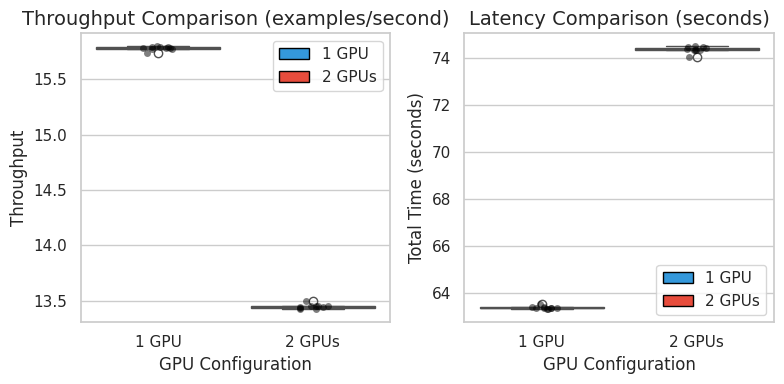

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

def visualize_benchmark_results(one_gpu_results, two_gpu_results):
    # Create dataframes for each GPU configuration
    one_gpu_df = pd.DataFrame(one_gpu_results)
    one_gpu_df['gpu_config'] = '1 GPU'
    
    two_gpu_df = pd.DataFrame(two_gpu_results)
    two_gpu_df['gpu_config'] = '2 GPUs'
    
    # Combine the dataframes
    combined_df = pd.concat([one_gpu_df, two_gpu_df])
    
    # Set the style and color palette
    sns.set(style="whitegrid")
    colors = ["#3498db", "#e74c3c"]  # Blue for 1 GPU, Red for 2 GPUs
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    
    # Plot throughput
    sns.boxplot(x='gpu_config', y='throughput', data=combined_df, ax=ax1, palette=colors)
    sns.stripplot(x='gpu_config', y='throughput', data=combined_df, color='black', size=5, alpha=0.5, ax=ax1)
    ax1.set_title('Throughput Comparison (examples/second)', fontsize=14)
    ax1.set_ylabel('Throughput', fontsize=12)
    ax1.set_xlabel('GPU Configuration', fontsize=12)
    
    # Plot latency (total_time)
    sns.boxplot(x='gpu_config', y='total_time', data=combined_df, ax=ax2, palette=colors)
    sns.stripplot(x='gpu_config', y='total_time', data=combined_df, color='black', size=5, alpha=0.5, ax=ax2)
    ax2.set_title('Latency Comparison (seconds)', fontsize=14)
    ax2.set_ylabel('Total Time (seconds)', fontsize=12)
    ax2.set_xlabel('GPU Configuration', fontsize=12)
    
    # Add a legend with custom colors
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=colors[0], edgecolor='black', label='1 GPU'),
        Patch(facecolor=colors[1], edgecolor='black', label='2 GPUs')
    ]
    ax1.legend(handles=legend_elements, loc='upper right')
    ax2.legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    return fig, combined_df

# Visualize the results
fig, combined_df = visualize_benchmark_results(one_gpu_results, two_gpu_results)
aggregated_df = combined_df.groupby('gpu_config').agg({
    'throughput': ['mean', 'std', 'min', 'max'],
    'total_time': ['mean', 'std', 'min', 'max']
})
# Display summary statistics
print("Summary Statistics:")
print(aggregated_df)

# save the figures and the aggregated df
fig.savefig('../data/benchmarking-batch/benchmark_results_one_gpu_vs_two_gpu.png')
aggregated_df.to_csv('../data/benchmarking-batch/benchmark_results_one_gpu_vs_two_gpu.csv', index=False)